<a href="https://colab.research.google.com/github/sanket7293/my_projects/blob/main/ANN_keras_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/diabetes (1).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
602,1,124,74,36,0,27.8,0.100,30
429,1,95,82,25,180,35.0,0.233,43
623,0,94,70,27,115,43.5,0.347,21
209,7,184,84,33,0,35.5,0.355,41
589,0,73,0,0,0,21.1,0.342,25


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X_train_scaled

array([[-0.85811767,  0.06488386,  0.25332145, ..., -0.51313743,
        -1.10316947, -0.27704152],
       [-0.85811767, -0.84697246,  0.66358026, ...,  0.4081093 ,
        -0.71238555,  0.84376203],
       [-1.15412006, -0.87841578,  0.04819205, ...,  1.49569224,
        -0.37742791, -1.05298243],
       ...,
       [ 0.02988949,  0.09632718,  0.04819205, ..., -0.3723914 ,
         1.96433735,  1.01619334],
       [-0.2661129 , -0.18666271,  0.25332145, ..., -0.70506383,
        -1.08260189, -0.79433546],
       [ 0.02988949, -0.37532264, -0.15693736, ...,  0.0114614 ,
        -0.01308802, -0.36325717]])

In [10]:
X_train_scaled.shape

(614, 8)

In [11]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
model = Sequential()

model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dropout(0.2))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103 (412.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.2,verbose=1,epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 216ms/step - accuracy: 0.3907 - loss: 0.9196 - val_accuracy: 0.2033 - val_loss: 0.8982
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3745 - loss: 0.8527 - val_accuracy: 0.2033 - val_loss: 0.8582
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4140 - loss: 0.7950 - val_accuracy: 0.2439 - val_loss: 0.8255
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4396 - loss: 0.8032 - val_accuracy: 0.2439 - val_loss: 0.7967
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4454 - loss: 0.7834 - val_accuracy: 0.2764 - val_loss: 0.7728
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4703 - loss: 0.7558 - val_accuracy: 0.3252 - val_loss: 0.7536
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4870 - loss: 0.7538 - val_accuracy: 0.3659 - val_loss: 0.7366
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4708 - loss: 0.7285 - val_accuracy: 0.

In [16]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

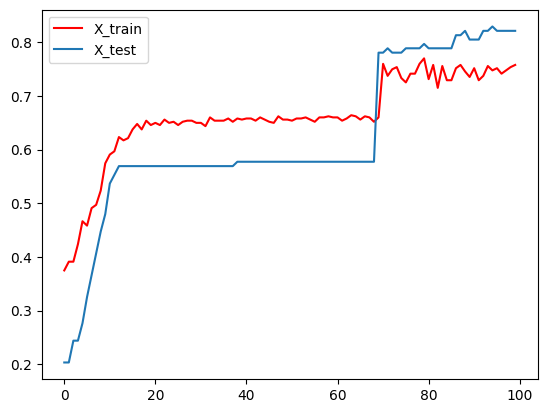

In [17]:
plt.plot(history.history['accuracy'],label='X_train',c='r')
plt.plot(history.history['val_accuracy'],label='X_test')
plt.legend()
plt.show()

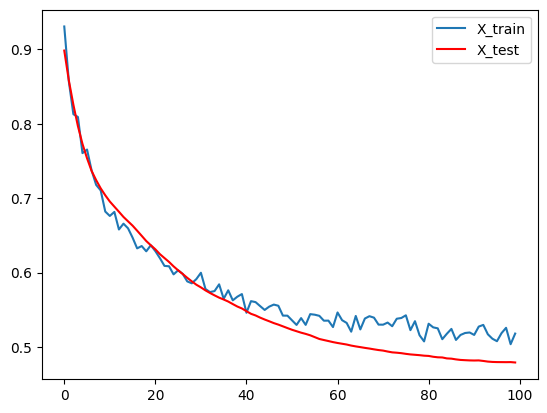

In [18]:
plt.plot(history.history['loss'],label='X_train')
plt.plot(history.history['val_loss'],label='X_test',c ='r')
plt.legend()
plt.show()

In [19]:
y_log = model.predict(X_test_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [20]:
Y_pred = np.where(y_log>0.5,1,0)

In [21]:
accuracy_score(Y_test,Y_pred)

0.7792207792207793